In [1]:
import os
import warnings

from numba import errors

warnings.filterwarnings("ignore", category=errors.NumbaDeprecationWarning)

import hydra
import polars as pl
import seaborn as sns
from ydata_profiling import ProfileReport


In [2]:
%matplotlib inline

In [3]:
with hydra.initialize(os.path.join("configs", "data"), version_base="1.3"):
    data_config = hydra.compose("mts_lib")

In [4]:
users = pl.read_parquet(data_config.dump_files.users_path)

In [5]:
users.describe()

describe,user_id,age,sex
str,f64,str,str
"""count""",142888.0,"""142888""","""142888"""
"""null_count""",0.0,"""146""","""6262"""
"""mean""",79763.07769,null,null
"""std""",46068.679277,null,null
"""min""",1.0,null,null
"""max""",159611.0,null,null
"""median""",79757.5,null,null
"""25%""",39852.0,null,null
"""75%""",119652.0,null,null


In [6]:
users.head(n=2)

user_id,age,sex
u32,cat,cat
1,"""45_54""",null
2,"""18_24""","""0"""


In [7]:
user_report = ProfileReport(
    users.select(pl.col("*").exclude("user_id")).to_pandas().astype("category"), dark_mode=True,
    )

In [8]:
user_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
items = pl.read_parquet(data_config.dump_files.items_path)

In [10]:
items.head()

item_id,title,genres,authors,year
u32,str,str,str,cat
128115,"""ворон-челобитч…","""зарубежная кла…","""Михаил Салтыко…","""1886"""
210979,"""скрипка ротшил…","""классическая п…","""Антон Чехов""","""1894"""
95632,"""испорченные де…","""зарубежная кла…","""Михаил Салтыко…","""1869"""
247906,"""странный челов…","""литература 19 …","""Михаил Лермонт…","""1831"""
294280,"""господа ташкен…","""зарубежная кла…","""Михаил Салтыко…","""1873"""


In [11]:
items_report = ProfileReport(
    items.select(pl.col("*").exclude("item_id")).to_pandas(), minimal=True
)

In [12]:
items_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
interactions = pl.read_parquet(data_config.dump_files.interactions_path).filter(
    pl.col("user_id").is_in(users.get_column("user_id").unique()) & pl.col("item_id").is_in(items.get_column("item_id").unique())
)

In [14]:
interactions.describe()

describe,user_id,item_id,progress,rating,start_date
str,f64,f64,f64,f64,str
"""count""",1.399932e6,1.399932e6,1.399932e6,1.399932e6,"""1399932"""
"""null_count""",0.0,0.0,0.0,0.0,"""0"""
"""mean""",79727.370951,160370.840816,47.924868,NaN,null
"""std""",45978.473269,92932.012435,38.555174,NaN,null
"""min""",1.0,1.0,0.0,1.0,"""2018-01-01"""
"""max""",159611.0,321751.0,100.0,5.0,"""2019-12-31"""
"""median""",79504.5,158918.0,45.0,NaN,null
"""25%""",40104.0,81296.0,7.0,NaN,null
"""75%""",119639.0,241026.0,90.0,NaN,null


In [15]:
inter_report = ProfileReport(interactions.select(pl.col("*").exclude("item_id", "user_id")).to_pandas())

In [16]:
inter_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='progress', ylabel='Percent'>

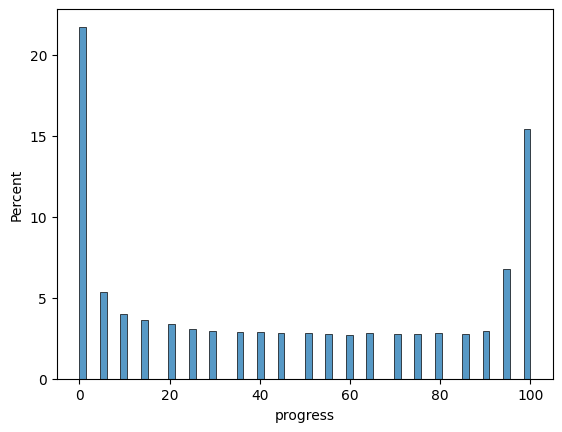

In [19]:
sns.histplot(interactions.select((pl.col("progress") // 5) * 5).to_pandas(use_pyarrow_extension_array=True), x="progress",
             stat="percent")

<Axes: xlabel='progress', ylabel='num_interactions'>

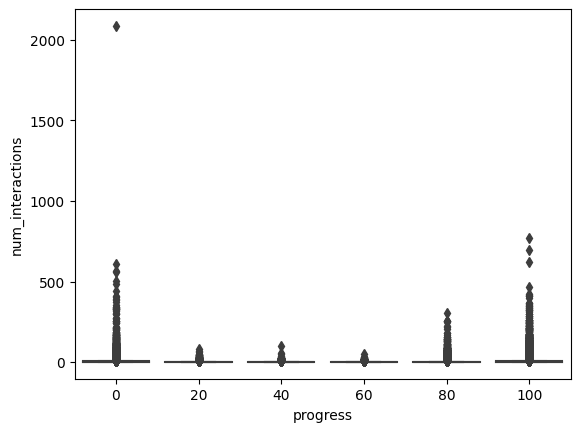

In [27]:
sns.boxplot(interactions.with_columns((pl.col("progress") // 20) * 20).groupby("user_id", "progress").agg(
    pl.count("item_id").alias("num_interactions")).to_pandas(use_pyarrow_extension_array=True), y="num_interactions", x="progress")
